<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


## Assessing Similarities between New York and Paris, New York and Toronto, and Paris and Toronto ##


In [ ]:
#!pip install bs4
!pip install geocoder
!pip install requests
!pip install geopy

print('Installation Completed.')

     |████████████████████████████████| 102kB 4.0MB/s 
Installation Completed.


## Import the required modules and functions##

In [ ]:
#from bs4 import BeautifulSoup # this module helps in web scrapping.
#import requests  # this module helps us to download a web page
#import pandas as pd # library for data analsysis

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
#from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0


print('Libraries imported.')

Matplotlib version:  3.2.2
Libraries imported.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Obtain latitude and longitude of Toronto, New York, Paris ##



In [ ]:
address_toronto = 'Toronto, ON, Canada'

geolocator_toronto = Nominatim(user_agent="toronto_explorer")
location_toronto = geolocator_toronto.geocode(address_toronto)
latitude_toronto = location_toronto.latitude
longitude_toronto = location_toronto.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude_toronto, longitude_toronto))

address_paris = 'Paris, France'

geolocator_paris = Nominatim(user_agent="paris_explorer")
location_paris = geolocator_paris.geocode(address_paris)
latitude_paris = location_paris.latitude
longitude_paris = location_paris.longitude
print('The geograpical coordinate of Paris, France are {}, {}.'.format(latitude_paris, longitude_paris))

address_newyork = 'New York City, NY, USA'

geolocator_newyork = Nominatim(user_agent="ny_explorer")
location_newyork = geolocator_newyork.geocode(address_newyork)
latitude_newyork = location_newyork.latitude
longitude_newyork = location_newyork.longitude
print('The geograpical coordinate of New York, United states are {}, {}.'.format(latitude_newyork, longitude_newyork))

The geograpical coordinate of Toronto, Canada are 43.6534817, -79.3839347.
The geograpical coordinate of Paris, France are 48.8566969, 2.3514616.
The geograpical coordinate of New York, United states are 40.7127281, -74.0060152.


In [ ]:

# create map of paris using latitude_paris and longitude_paris values
map_toronto = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)
map_paris   = folium.Map(location=[latitude_paris, longitude_paris], zoom_start=11)
map_newyork = folium.Map(location=[latitude_newyork, longitude_newyork], zoom_start=11)
# add markers to map


In [ ]:
#map_toronto



In [ ]:
#map_paris



In [ ]:
#map_newyork


Utilizing the Foursquare API to explore the Toronto, Paris, and New York


#### Define Foursquare Credentials and Version for Toronto, Paris, and New York

In [ ]:
CLIENT_ID = 'IJ3MVE3LANFMG0Z4GAZXG3WLZBAVDPUEKM2LKDPXZMRFAWDH' # your Foursquare ID
CLIENT_SECRET = 'WPUC4FP2GCCEMK5TII3LMNYCCJFELQ4ORUSSIFK0P24SNMRV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IJ3MVE3LANFMG0Z4GAZXG3WLZBAVDPUEKM2LKDPXZMRFAWDH
CLIENT_SECRET:WPUC4FP2GCCEMK5TII3LMNYCCJFELQ4ORUSSIFK0P24SNMRV


#### Now, let's get the top 100 venues that are around New York, Paris, and Toronto within a radius of 1000 meters.

First, let's create the GET request URLs for Neow Yprk, Paris, and Toronto.

In [ ]:
# type your answer here
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_toronto,
    longitude_toronto,
    radius, 
    LIMIT)
print (url) # display URL


LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

url_paris = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_paris, 
    longitude_paris, 
    radius, 
    LIMIT)
print (url_paris) # display URL


LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

url_newyork = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_newyork, 
    longitude_newyork, 
    radius, 
    LIMIT)
print (url_newyork) # display URL


https://api.foursquare.com/v2/venues/explore?&client_id=IJ3MVE3LANFMG0Z4GAZXG3WLZBAVDPUEKM2LKDPXZMRFAWDH&client_secret=WPUC4FP2GCCEMK5TII3LMNYCCJFELQ4ORUSSIFK0P24SNMRV&v=20180605&ll=43.6534817,-79.3839347&radius=1000&limit=200
https://api.foursquare.com/v2/venues/explore?&client_id=IJ3MVE3LANFMG0Z4GAZXG3WLZBAVDPUEKM2LKDPXZMRFAWDH&client_secret=WPUC4FP2GCCEMK5TII3LMNYCCJFELQ4ORUSSIFK0P24SNMRV&v=20180605&ll=48.8566969,2.3514616&radius=1000&limit=200
https://api.foursquare.com/v2/venues/explore?&client_id=IJ3MVE3LANFMG0Z4GAZXG3WLZBAVDPUEKM2LKDPXZMRFAWDH&client_secret=WPUC4FP2GCCEMK5TII3LMNYCCJFELQ4ORUSSIFK0P24SNMRV&v=20180605&ll=40.7127281,-74.0060152&radius=1000&limit=200


**Obtain venus in toronto, paris, and new york  in 1000 meters radious  in jason format**

In [ ]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60c35f0bf3ef6a0ce49b1942'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-5227bb01498e17bf485e6202-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
          'suffix': '.png'},
         'id': '4f2a25ac4b909258e854f55f',
         'name': 'Neighborhood',
         'pluralName': 'Neighborhoods',
         'primary': True,
         'shortName': 'Neighborhood'}],
       'id': '5227bb01498e17bf485e6202',
       'location': {'cc': 'CA',
        'city': 'Toronto',
        'country': 'Canada',
        'distance': 113,
        'formattedAddress': ['Toronto ON', 'Canada'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
          'lng': -79.38529600606677}],
        'lat': 43.6532

In [ ]:
results_paris = requests.get(url_paris).json()
results_paris

{'meta': {'code': 200, 'requestId': '60c35f0c1b29f53ef1f51a97'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-58e0f18f561ded7abcbbbd01-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d163941735',
         'name': 'Park',
         'pluralName': 'Parks',
         'primary': True,
         'shortName': 'Park'}],
       'id': '58e0f18f561ded7abcbbbd01',
       'location': {'address': 'Quais de Seine',
        'cc': 'FR',
        'city': 'Paris',
        'country': 'France',
        'distance': 132,
        'formattedAddress': ['Quais de Seine', '75000 Paris', 'France'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.85551048052973,
          'lng': 2.3514188826084137}],


In [ ]:
results_newyork = requests.get(url_newyork).json()
results_newyork

{'meta': {'code': 200, 'requestId': '60c35f0cad3ac101a2a455b4'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-57f0689d498e7d49d9189369-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_bar_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1d5941735',
         'name': 'Hotel Bar',
         'pluralName': 'Hotel Bars',
         'primary': True,
         'shortName': 'Hotel Bar'}],
       'id': '57f0689d498e7d49d9189369',
       'location': {'address': '123 Nassau St',
        'cc': 'US',
        'city': 'New York',
        'country': 'United States',
        'distance': 157,
        'formattedAddress': ['123 Nassau St',
         'New York, NY 10038',
         'United States'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.711



**Converting Jason format into panda data frames**

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
venues = results['response']['groups'][0]['items']
  
nearby_venues = json_normalize(venues) # flatten JSON
filtered_columns = ['venue.location.country',    'venue.location.city', 'venue.location.postalCode','venue.location.neighborhood', 'venue.name', 'venue.categories',    'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]


nearby_venues.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,venue.location.country,venue.location.city,venue.location.postalCode,venue.location.neighborhood,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Canada,Toronto,NaN,NaN,Downtown Toronto,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",43.653232,-79.385296
1,Canada,Toronto,M5H 2N1,NaN,Nathan Phillips Square,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",43.652270,-79.383516
2,Canada,Toronto,M5B 2H1,NaN,LUSH,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.653557,-79.380400
3,Canada,Toronto,NaN,NaN,M Square Coffee Co,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",43.651218,-79.383555
4,Canada,Toronto,NaN,NaN,Magic Tailor,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.653742,-79.379745


In [ ]:
# filter the category for each row
#nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.head()


,venue.location.country,venue.location.city,venue.location.postalCode,venue.location.neighborhood,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Canada,Toronto,NaN,NaN,Downtown Toronto,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",43.653232,-79.385296
1,Canada,Toronto,M5H 2N1,NaN,Nathan Phillips Square,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",43.652270,-79.383516
2,Canada,Toronto,M5B 2H1,NaN,LUSH,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.653557,-79.380400
3,Canada,Toronto,NaN,NaN,M Square Coffee Co,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",43.651218,-79.383555
4,Canada,Toronto,NaN,NaN,Magic Tailor,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.653742,-79.379745


In [ ]:
#nearby_venues.shape

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            #v['venue']['country'], 
            #v['venue']['city'], 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [ 'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)        

In [ ]:
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.shape

(100, 8)

## **Now we are ready to clean the json and structure it into a _pandas_ dataframe.**

In [ ]:
venues = results['response']['groups'][0]['items']
  
nearby_venues = json_normalize(venues) # flatten JSON

#venues.head()
#venue.location.postalCode
# filter columns
filtered_columns = ['venue.location.country',    'venue.location.city', 'venue.location.postalCode','venue.location.neighborhood', 'venue.name', 'venue.categories',    'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns  - remove .
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

# clean null postal code
#nearby_venues = nearby_venues[nearby_venues.postalCode.notnull()]


venues_paris = results_paris['response']['groups'][0]['items']
nearby_venues_paris = json_normalize(venues_paris) # flatten JSON
# filter columns
filtered_columns = ['venue.location.country','venue.location.city','venue.location.postalCode','venue.location.neighborhood','venue.name', 'venue.categories',  'venue.location.lat', 'venue.location.lng']
nearby_venues_paris =nearby_venues_paris.loc[:, filtered_columns]
# filter the category for each row
nearby_venues_paris['venue.categories'] = nearby_venues_paris.apply(get_category_type, axis=1)
# clean columns
nearby_venues_paris.columns = [col.split(".")[-1] for col in nearby_venues_paris.columns]
# clean null postal code
#nearby_venues_paris = nearby_venues_paris[nearby_venues_paris.postalCode.notnull()]

venues_newyork = results_newyork['response']['groups'][0]['items']
nearby_venues_newyork = json_normalize(venues_newyork) # flatten JSON
# filter columns
filtered_columns = ['venue.location.country','venue.location.city','venue.location.postalCode', 'venue.location.neighborhood','venue.name', 'venue.categories',  'venue.location.lat', 'venue.location.lng']
nearby_venues_newyork =nearby_venues_newyork.loc[:, filtered_columns]
# filter the category for each row
nearby_venues_newyork['venue.categories'] = nearby_venues_newyork.apply(get_category_type, axis=1)
# clean columns
nearby_venues_newyork.columns = [col.split(".")[-1] for col in nearby_venues_newyork.columns]
# clean null postal code
#nearby_venues_newyork = nearby_venues_newyork[nearby_venues_newyork.postalCode.notnull()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [ ]:
nearby_venues.head()


,country,city,postalCode,neighborhood,name,categories,lat,lng
0,Canada,Toronto,NaN,NaN,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Canada,Toronto,M5H 2N1,NaN,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Canada,Toronto,M5B 2H1,NaN,LUSH,Cosmetics Shop,43.653557,-79.380400
3,Canada,Toronto,NaN,NaN,M Square Coffee Co,Coffee Shop,43.651218,-79.383555
4,Canada,Toronto,NaN,NaN,Magic Tailor,Clothing Store,43.653742,-79.379745


In [ ]:
nearby_venues_paris.head()

,country,city,postalCode,neighborhood,name,categories,lat,lng
0,France,Paris,75000,NaN,Parc Rives de Seine,Park,48.855510,2.351419
1,France,Paris,75004,NaN,Maison Aleph,Pastry Shop,48.857348,2.354873
2,France,Paris,75004,NaN,Place de l'Hôtel de Ville – Esplanade de la Li...,Plaza,48.857010,2.351656
3,France,Paris,75004,NaN,Fleux',Furniture / Home Store,48.858763,2.354161
4,France,Paris,75004,NaN,Tasca,Portuguese Restaurant,48.856686,2.356374


In [ ]:
nearby_venues_newyork.head()

,country,city,postalCode,neighborhood,name,categories,lat,lng
0,United States,New York,10038,Financial District,The Bar Room at Temple Court,Hotel Bar,40.711448,-74.006802
1,United States,New York,10038,NaN,Alba Dry Cleaner & Tailor,Laundry Service,40.711434,-74.006272
2,United States,New York,10038,NaN,"The Beekman, A Thompson Hotel",Hotel,40.711173,-74.006702
3,United States,New York,10007,NaN,The Class by Taryn Toomey,Gym / Fitness Center,40.712753,-74.008734
4,United States,New York,10007,NaN,Takahachi Bakery,Bakery,40.713653,-74.008804


Basic Information about total venues and unique categories

In [ ]:
print('{} venues in Toronto were returned by Foursquare.'.format(nearby_venues.shape[0]))
print('{} venues in Paris were returned by Foursquare.'.format(nearby_venues_paris.shape[0]))
print('{} venues in New York were returned by Foursquare.'.format(nearby_venues_newyork.shape[0]))

100 venues in Toronto were returned by Foursquare.
100 venues in Paris were returned by Foursquare.
100 venues in New York were returned by Foursquare.


In [ ]:
df_all_cities = nearby_venues.append([nearby_venues_paris, nearby_venues_newyork])
print(df_all_cities.shape)
df_all_cities.head()

(300, 8)


,country,city,postalCode,neighborhood,name,categories,lat,lng
0,Canada,Toronto,NaN,NaN,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Canada,Toronto,M5H 2N1,NaN,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Canada,Toronto,M5B 2H1,NaN,LUSH,Cosmetics Shop,43.653557,-79.380400
3,Canada,Toronto,NaN,NaN,M Square Coffee Co,Coffee Shop,43.651218,-79.383555
4,Canada,Toronto,NaN,NaN,Magic Tailor,Clothing Store,43.653742,-79.379745


#### Let's create a function to repeat the same process to all the venues

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            #v['venue']['country'], 
            #v['venue']['city'], 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [ 'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)        

#### Now write the code to run the above function on each neighborhood and create a new dataframe called _toronto_venues_.

In [ ]:
# type your answer here
#toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
#                                   latitudes=toronto_data['Latitude'],
#                                   longitudes=toronto_data['Longitude']
#                                  )

#toronto_venues = getNearbyVenues(names=nearby_venues['postalCode'],
#                                   latitudes=nearby_venues['lat'],
#                                   longitudes=nearby_venues['lng']
#                                  )




Let's find out how many unique categories can be curated from all the returned venues

In [ ]:
#print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))
print('There are {} uniques categories.'.format(len(df_all_cities['categories'].unique())))


There are 117 uniques categories.


## Analyze Each City, Categories

In [ ]:
# one hot encoding
df_all_cities_onehot = pd.get_dummies(df_all_cities[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_all_cities_onehot['city'] = df_all_cities['city'] 

# move neighborhood column to the first column
fixed_columns = [df_all_cities_onehot.columns[-1]] + list(df_all_cities_onehot.columns[:-1])
df_all_cities_onehot = df_all_cities_onehot[fixed_columns]

df_all_cities_onehot.head()

,city,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Australian Restaurant,Auvergne Restaurant,Baby Store,Bakery,Bar,Beer Store,Bistro,Bookstore,Boxing Gym,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cultural Center,Deli / Bodega,Dessert Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fountain,French Restaurant,Furniture / Home Store,Garden,Gastropub,Gay Bar,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Historic Site,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Laundry Service,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Martial Arts School,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Music Venue,Neighborhood,New American Restaurant,Opera House,Optical Shop,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Souvenir Shop,Souvlaki Shop,Spa,Speakeasy,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,University,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Toronto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Toronto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Toronto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Toronto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Toronto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the total number of venues and number of categories

In [ ]:
df_all_cities_onehot.shape

(300, 118)

Calculate venues total group by City

In [ ]:
df_all_cities_grouped = df_all_cities_onehot.groupby('city').sum().reset_index()
df_all_cities_grouped.shape


(3, 118)

In [ ]:
df_all_cities_grouped


,city,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Australian Restaurant,Auvergne Restaurant,Baby Store,Bakery,Bar,Beer Store,Bistro,Bookstore,Boxing Gym,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Cosmetics Shop,Creperie,Cultural Center,Deli / Bodega,Dessert Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fountain,French Restaurant,Furniture / Home Store,Garden,Gastropub,Gay Bar,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Historic Site,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Laundry Service,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Martial Arts School,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Music Venue,Neighborhood,New American Restaurant,Opera House,Optical Shop,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Souvenir Shop,Souvlaki Shop,Spa,Speakeasy,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,University,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,New York,2,1,1,0,0,1,1,1,0,1,1,0,0,0,2,1,1,1,2,0,3,0,1,0,2,3,10,0,0,0,0,0,0,1,1,2,2,0,3,1,0,0,0,1,1,2,3,0,2,1,2,0,0,1,1,0,1,1,0,1,0,1,1,1,0,3,1,0,0,0,1,1,0,0,2,0,1,1,2,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,5,0,0,1,0,1,0,0,0,0,0,0,1,0,4,1,1
1,Paris,0,0,4,2,0,0,0,0,1,0,5,3,1,1,3,0,0,1,1,0,1,1,1,1,0,0,3,0,0,2,0,1,2,1,0,1,0,1,11,1,3,0,1,2,0,0,0,1,0,0,6,1,1,1,1,0,0,0,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,2,0,5,1,0,0,0,3,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,1,2,1,0,1,0,0,3,0,0,0
2,Toronto,1,0,2,0,2,1,0,0,0,0,2,0,0,0,0,0,1,1,0,1,9,0,0,1,3,0,8,1,1,1,1,0,1,0,0,1,0,0,0,1,0,2,0,0,0,3,1,0,3,0,0,0,0,1,6,1,0,0,0,0,0,1,0,0,1,0,0,2,0,2,0,0,1,1,1,1,0,0,1,0,0,1,0,2,0,1,1,1,4,0,0,1,3,0,0,1,0,1,0,1,0,1,1,5,0,0,0,1,1,1,0,1,3,0,0,0,2


## **Transpose the above table to see categorial data side by side for each city**

In [ ]:
df_all_cities_grouped_t = df_all_cities_grouped.T
df_all_cities_grouped_t.reset_index(inplace=True)
df_all_cities_grouped_t.loc[0:0, 'index'] = "Category"
header = df_all_cities_grouped_t.iloc[0]
df_all_cities_grouped_t.columns = header
df_all_cities_grouped_t = df_all_cities_grouped_t.drop(0)
#df_all_cities_grouped_t.reindex(['Category','MainCategory',	'New York',	'Paris',	'Toronto'	], axis=1)
df_all_cities_grouped_t['MainCategory'] = 'False'
df_all_cities_grouped_t = df_all_cities_grouped_t[['Category','MainCategory','New York','Paris','Toronto' ]]
df_all_cities = df_all_cities_grouped_t
df_all_cities.shape
df_all_cities.head()

,Category,MainCategory,New York,Paris,Toronto
1,American Restaurant,False,2,0,1
2,Antique Shop,False,1,0,0
3,Art Gallery,False,1,4,2
4,Art Museum,False,0,2,0
5,Arts & Crafts Store,False,0,0,2


## **Reduce number of category, use main category to update similar categories** 
      - create main category and update with value 'Fales'
      - Every new run of notebook bring new venues with new category


In [ ]:
df_all_cities.loc[df_all_cities['Category'].str.contains('Bar'), "MainCategory"] = "Bar"
df_all_cities.loc[df_all_cities['Category'].str.contains('Pub'), "MainCategory"] = "Bar"

df_all_cities.loc[df_all_cities['Category'].str.contains('Restaurant'), "MainCategory"] = "Restaurant"
df_all_cities.loc[df_all_cities['Category'].str.contains('Taco Place'), "MainCategory"] = "Restaurant"
df_all_cities.loc[df_all_cities['Category'].str.contains('Steakhouse'), "MainCategory"] = "Restaurant"
df_all_cities.loc[df_all_cities['Category'].str.contains('Breakfast Spot'), "MainCategory"] = "Restaurant"
df_all_cities.loc[df_all_cities['Category'].str.contains('Burger Joint'), "MainCategory"] = "Restaurant"
df_all_cities.loc[df_all_cities['Category'].str.contains('Café'), "MainCategory"] = "Restaurant"
df_all_cities.loc[df_all_cities['Category'].str.contains('Creperie'), "MainCategory"] = "Restaurant"
df_all_cities.loc[df_all_cities['Category'].str.contains('Deli / Bodega'), "MainCategory"] = "Restaurant"
df_all_cities.loc[df_all_cities['Category'].str.contains('Creperie'), "MainCategory"] = "Restaurant"
df_all_cities.loc[df_all_cities['Category'].str.contains('Gastropub'), "MainCategory"] = "Restaurant"
df_all_cities.loc[df_all_cities['Category'].str.contains('Bistro'), "MainCategory"] = "Restaurant"
df_all_cities.loc[df_all_cities['Category'].str.contains('Poke Place'), "MainCategory"] = "Restaurant"
df_all_cities.loc[df_all_cities['Category'].str.contains('Pizza Place'), "MainCategory"] = "Restaurant"
df_all_cities.loc[df_all_cities['Category'].str.contains('Burrito Place'), "MainCategory"] = "Restaurant"
df_all_cities.loc[df_all_cities['Category'].str.contains('Sandwich Place'), "MainCategory"] = "Restaurant"

df_all_cities.loc[df_all_cities['Category'].str.contains('Shop'), "MainCategory"] = "Shop"
df_all_cities.loc[df_all_cities['Category'].str.contains('Bakery'), "MainCategory"] = "Shop"

df_all_cities.loc[df_all_cities['Category'].str.contains('Fountain'), "MainCategory"] = "Park"
df_all_cities.loc[df_all_cities['Category'].str.contains('Garden'), "MainCategory"] = "Park"
df_all_cities.loc[df_all_cities['Category'].str.contains('Park'), "MainCategory"] = "Park"

df_all_cities.loc[df_all_cities['Category'].str.contains('Gym'), "MainCategory"] = "Gym"
df_all_cities.loc[df_all_cities['Category'].str.contains('Pilates Studio'), "MainCategory"] = "Gym"
df_all_cities.loc[df_all_cities['Category'].str.contains('Playground'), "MainCategory"] = "Gym"
df_all_cities.loc[df_all_cities['Category'].str.contains('Spa'), "MainCategory"] = "Gym"
df_all_cities.loc[df_all_cities['Category'].str.contains('Yoga Studio'), "MainCategory"] = "Gym"

df_all_cities.loc[df_all_cities['Category'].str.contains('Bookstore'), "MainCategory"] = "Store"
df_all_cities.loc[df_all_cities['Category'].str.contains('Farmers Market'), "MainCategory"] = "Store"
df_all_cities.loc[df_all_cities['Category'].str.contains('Store'), "MainCategory"] = "Store"

df_all_cities.loc[df_all_cities['Category'].str.contains('Strip Club'), "MainCategory"] = "Adult Entertainment"

df_all_cities.loc[df_all_cities['Category'].str.contains('Theater'), "MainCategory"] = "Entertainment"
df_all_cities.loc[df_all_cities['Category'].str.contains('Trail'), "MainCategory"] = "Entertainment"
df_all_cities.loc[df_all_cities['Category'].str.contains('Scenic Lookout'), "MainCategory"] = "Entertainment"
df_all_cities.loc[df_all_cities['Category'].str.contains('Gallery'), "MainCategory"] = "Entertainment"
df_all_cities.loc[df_all_cities['Category'].str.contains('Museum'), "MainCategory"] = "Entertainment"
df_all_cities.loc[df_all_cities['Category'].str.contains('Concert Hall'), "MainCategory"] = "Entertainment"
df_all_cities.loc[df_all_cities['Category'].str.contains('Cultural Center'), "MainCategory"] = "Entertainment"
df_all_cities.loc[df_all_cities['Category'].str.contains('Dance Studio'), "MainCategory"] = "Entertainment"
df_all_cities.loc[df_all_cities['Category'].str.contains('Historic Site'), "MainCategory"] = "Entertainment"
df_all_cities.loc[df_all_cities['Category'].str.contains('Music Venue'), "MainCategory"] = "Entertainment"
df_all_cities.loc[df_all_cities['Category'].str.contains('Opera House'), "MainCategory"] = "Entertainment"
df_all_cities.loc[df_all_cities['Category'].str.contains('Auditorium'), "MainCategory"] = "Entertainment"
df_all_cities.loc[df_all_cities['Category'].str.contains('Monument / Landmark'), "MainCategory"] = "Entertainment"

df_all_cities.loc[df_all_cities['Category'].str.contains('Hotel'), "MainCategory"] = "Hotel"

df_all_cities.loc[df_all_cities['Category'].str.contains('Memorial Site'), "MainCategory"] = "Memorial Site"

df_all_cities.loc[df_all_cities['Category'].str.contains('Laundry Service'), "MainCategory"] = "Others"
df_all_cities.loc[df_all_cities['Category'].str.contains('Neighborhood'), "MainCategory"] = "Others"
df_all_cities.loc[df_all_cities['Category'].str.contains('Speakeasy'), "MainCategory"] = "Others"
df_all_cities.loc[df_all_cities['Category'].str.contains('University'), "MainCategory"] = "Others"

df_all_cities.loc[df_all_cities['Category'].str.contains('Pedestrian Plaza'), "MainCategory"] = "Plaza"
df_all_cities.loc[df_all_cities['Category'].str.contains('Plaza'), "MainCategory"] = "Plaza"

df_all_cities.head(10)

,Category,MainCategory,New York,Paris,Toronto
1,American Restaurant,Restaurant,2,0,1
2,Antique Shop,Shop,1,0,0
3,Art Gallery,Entertainment,1,4,2
4,Art Museum,Entertainment,0,2,0
5,Arts & Crafts Store,Store,0,0,2
6,Asian Restaurant,Restaurant,1,0,1
7,Auditorium,Entertainment,1,0,0
8,Australian Restaurant,Restaurant,1,0,0
9,Auvergne Restaurant,Restaurant,0,1,0
10,Baby Store,Store,1,0,0


In [ ]:
df_all_cities.loc[df_all_cities['MainCategory'].str.contains('False'), "MainCategory"] = "Newly Added"

In [ ]:
df_all_cities.drop(['Category'], axis=1, inplace=True)
df_all_cities.head()


,MainCategory,New York,Paris,Toronto
1,Restaurant,2,0,1
2,Shop,1,0,0
3,Entertainment,1,4,2
4,Entertainment,0,2,0
5,Store,0,0,2


In [ ]:
#df_all_cities.groupby(['MainCategory']).sum()
#df_all_cities.groupby(by='MainCategory').sum()

df_all_cities = df_all_cities.groupby('MainCategory').sum().reset_index()


df_all_cities.head(10)

,MainCategory,New York,Paris,Toronto
0,Bar,3,8,3
1,Entertainment,4,10,6
2,Gym,13,0,6
3,Hotel,3,0,3
4,Memorial Site,3,1,0
5,Newly Added,5,2,2
6,Others,1,0,3
7,Park,2,5,1
8,Plaza,1,6,2
9,Restaurant,29,35,51


In [ ]:

df_all_cities_NewYork_Paris = df_all_cities[["MainCategory", 	"New York",	"Paris"]]
df_all_cities_NewYork_Toronto = df_all_cities[["MainCategory", 	"New York",	"Toronto"]]
df_all_cities_Paris_Toronto = df_all_cities[["MainCategory", 	"Paris",	"Toronto"]]

df_all_cities.loc[:,'Total'] = df_all_cities.sum(axis=1)
df_all_cities['Total']= df_all_cities.iloc[:, -4:-1].sum(axis=1)
df_all_cities.sort_values(by=['Total'], inplace=True, ascending=False)
df_all_cities.head()

,MainCategory,New York,Paris,Toronto,Total
9,Restaurant,29,35,51,115
10,Shop,22,26,16,64
11,Store,14,7,7,28
1,Entertainment,4,10,6,20
2,Gym,13,0,6,19


In [ ]:
print(df_all_cities_NewYork_Paris)
print(df_all_cities_NewYork_Toronto)
print(df_all_cities_Paris_Toronto)

0    MainCategory  New York  Paris
0             Bar         3      8
1   Entertainment         4     10
2             Gym        13      0
3           Hotel         3      0
4   Memorial Site         3      1
5     Newly Added         5      2
6          Others         1      0
7            Park         2      5
8           Plaza         1      6
9      Restaurant        29     35
10           Shop        22     26
11          Store        14      7
0    MainCategory  New York  Toronto
0             Bar         3        3
1   Entertainment         4        6
2             Gym        13        6
3           Hotel         3        3
4   Memorial Site         3        0
5     Newly Added         5        2
6          Others         1        3
7            Park         2        1
8           Plaza         1        2
9      Restaurant        29       51
10           Shop        22       16
11          Store        14        7
0    MainCategory  Paris  Toronto
0             Bar      8      

In [ ]:
df_all_cities['cum_sum'] = df_all_cities['Total'].cumsum()
df_all_cities['cum_perc%'] = 100*df_all_cities['cum_sum']/df_all_cities['Total'].sum()
df_all_cities.head()

,MainCategory,New York,Paris,Toronto,Total,cum_sum,cum_perc%
9,Restaurant,29,35,51,115,115,38.333333
10,Shop,22,26,16,64,179,59.666667
11,Store,14,7,7,28,207,69.000000
1,Entertainment,4,10,6,20,227,75.666667
2,Gym,13,0,6,19,246,82.000000


In [ ]:
df_all_cities_group_clean = df_all_cities
df_all_cities_group_clean

,MainCategory,New York,Paris,Toronto,Total,cum_sum,cum_perc%
9,Restaurant,29,35,51,115,115,38.333333
10,Shop,22,26,16,64,179,59.666667
11,Store,14,7,7,28,207,69.000000
1,Entertainment,4,10,6,20,227,75.666667
2,Gym,13,0,6,19,246,82.000000
0,Bar,3,8,3,14,260,86.666667
5,Newly Added,5,2,2,9,269,89.666667
8,Plaza,1,6,2,9,278,92.666667
7,Park,2,5,1,8,286,95.333333
3,Hotel,3,0,3,6,292,97.333333


In [ ]:
df_all_cities_test = df_all_cities_group_clean
df_all_cities_test.drop(['cum_sum', 'cum_perc%'], axis = 1, inplace = True)
df_all_cities_test

,MainCategory,New York,Paris,Toronto,Total
9,Restaurant,29,35,51,115
10,Shop,22,26,16,64
11,Store,14,7,7,28
1,Entertainment,4,10,6,20
2,Gym,13,0,6,19
0,Bar,3,8,3,14
5,Newly Added,5,2,2,9
8,Plaza,1,6,2,9
7,Park,2,5,1,8
3,Hotel,3,0,3,6


## Data Transformation, updating main category of coulmn for resturnat, bar, mall, shops etc.

Adding addition column to the dataframe

### **Expolatory Data Analysis**


consider cities as 3 sameples, Plot Sampe distribution

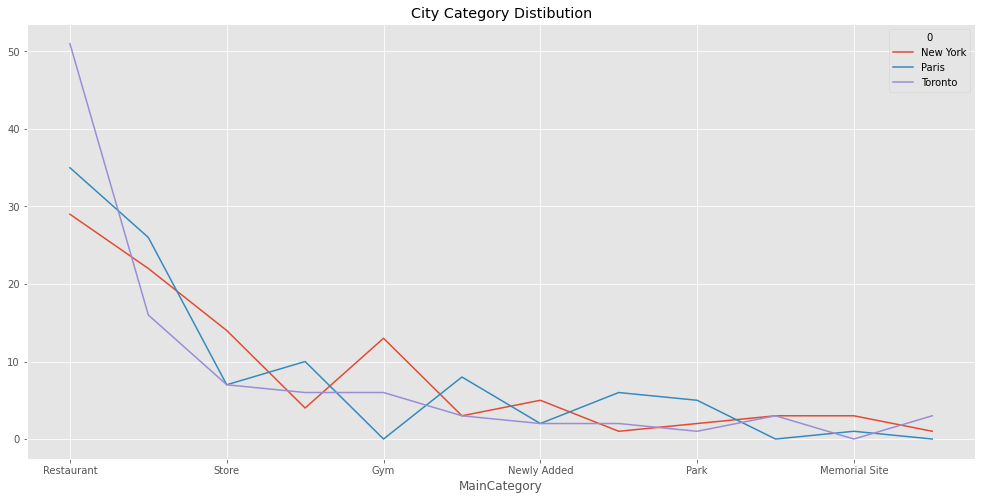

In [ ]:
df_all_cities_group_clean.plot.line(figsize=(17,8), x='MainCategory', y=['New York','Paris','Toronto'], title = 'City Category Distibution');
#lines = df_all_cities_group_clean.plot.line(y='MainCategory', x=['New York','France','Toronto'] )

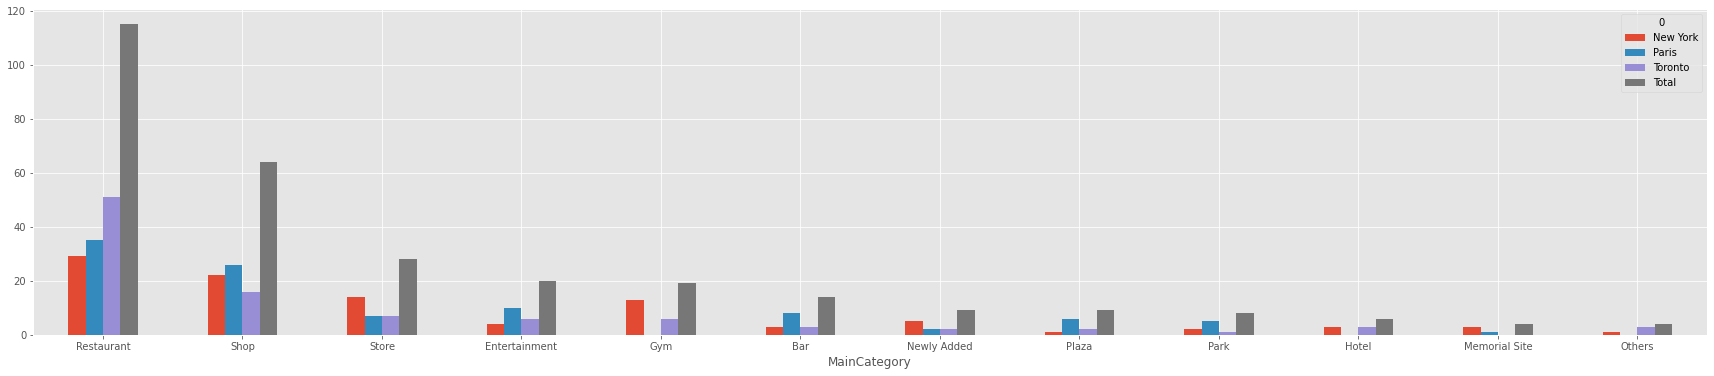

In [ ]:
df_all_cities_group_clean.plot.bar( x='MainCategory',  rot=0, figsize=(30,6))

Calculate Corelation between 

Add Column and Row Totals

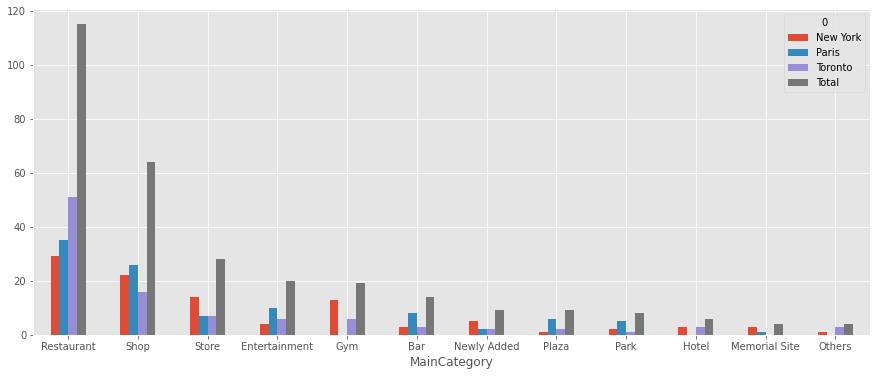

In [ ]:
df_all_cities_group_clean.plot.bar( x='MainCategory',  rot=0, figsize=(15,6))

#### Next, let's plot bar chart of categories/probability by each Cit each category


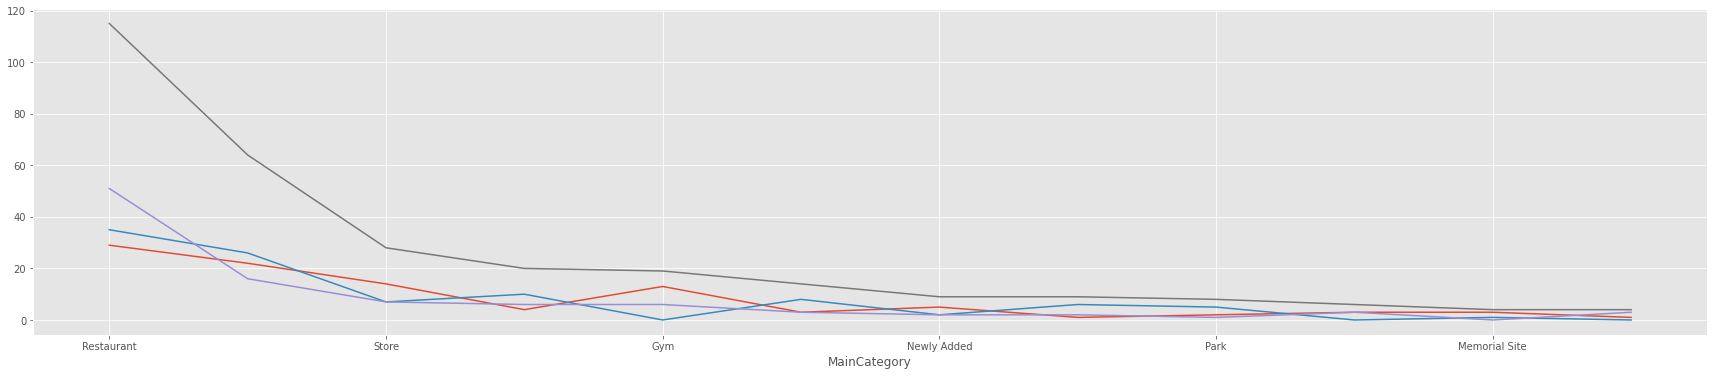

In [ ]:
df_all_cities_group_clean.plot.line(legend=None, x='MainCategory',  rot=0, figsize=(30,6))

In [ ]:
print(df_all_cities)
print
print
print(df_all_cities.corr())


0    MainCategory  New York  Paris  Toronto  Total
9      Restaurant        29     35       51    115
10           Shop        22     26       16     64
11          Store        14      7        7     28
1   Entertainment         4     10        6     20
2             Gym        13      0        6     19
0             Bar         3      8        3     14
5     Newly Added         5      2        2      9
8           Plaza         1      6        2      9
7            Park         2      5        1      8
3           Hotel         3      0        3      6
4   Memorial Site         3      1        0      4
6          Others         1      0        3      4
0         New York     Paris   Toronto     Total
0                                               
New York  1.000000  0.843823  0.865275  0.935653
Paris     0.843823  1.000000  0.887963  0.954262
Toronto   0.865275  0.887963  1.000000  0.970562
Total     0.935653  0.954262  0.970562  1.000000
